# **Support Vector Machine**

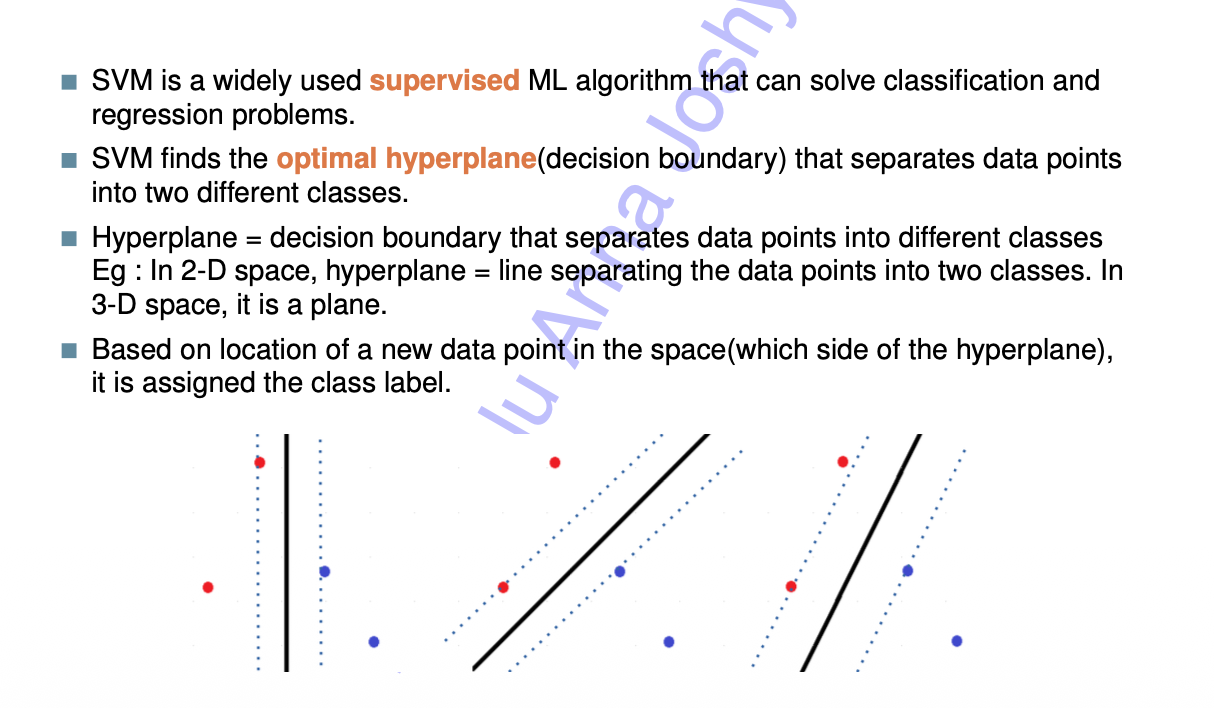

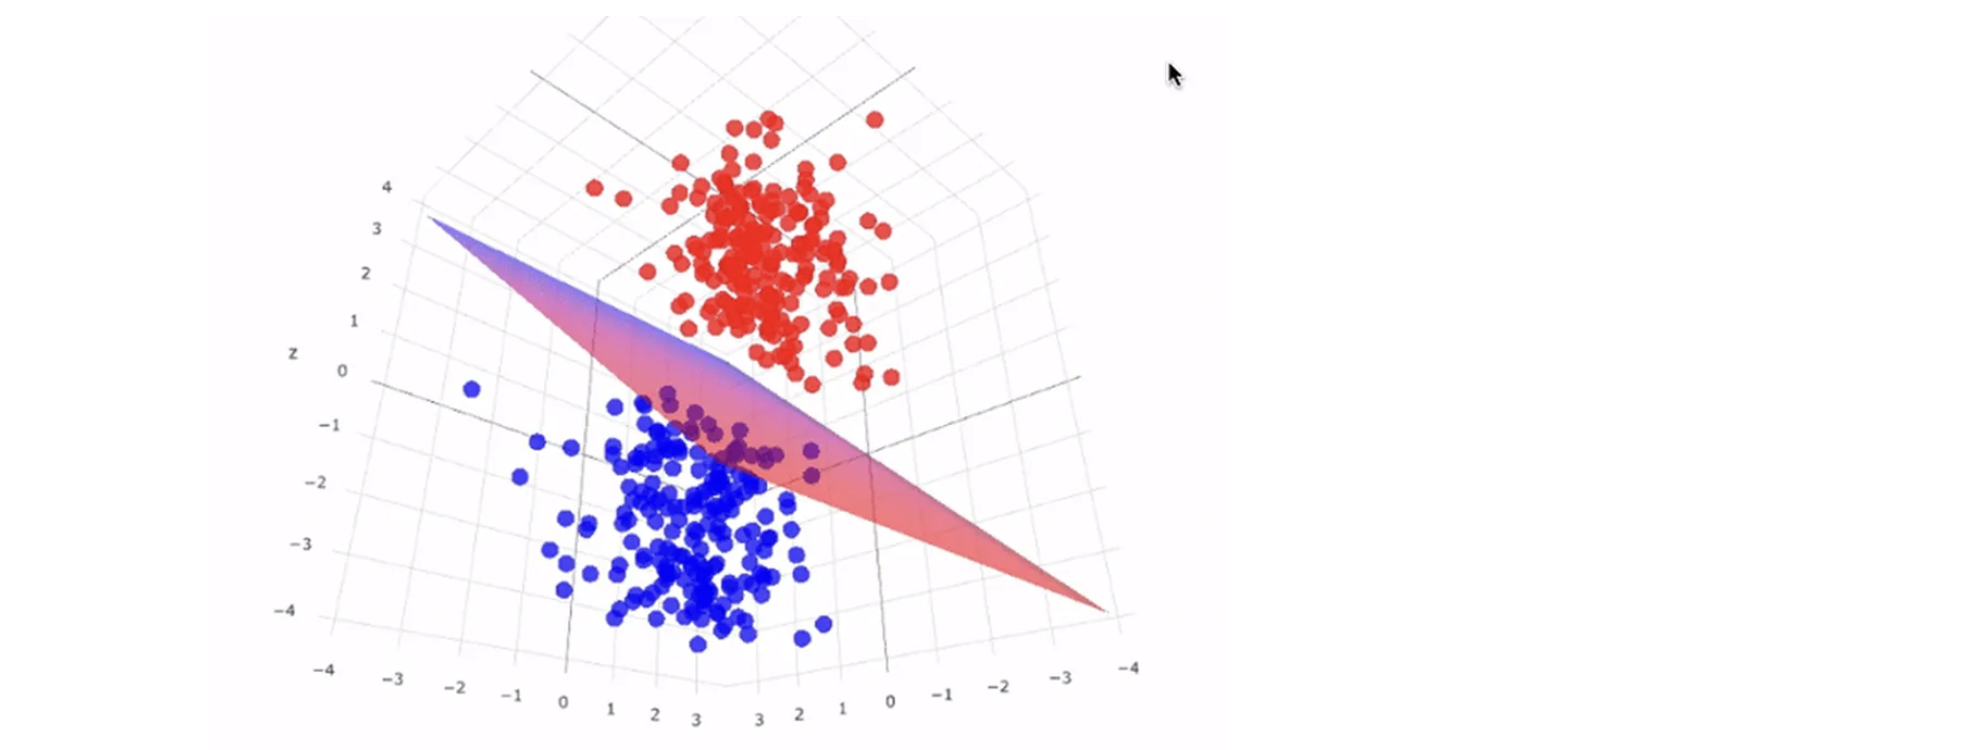

Ref: https://medium.com/low-code-for-advanced-data-science/support-vector-machines-svm-an-intuitive-explanation-b084d6238106

# **IRIS data classification**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load data
iris = load_iris()
X = iris.data[:, 2:4]   # petal length, petal width
y = iris.target

# Binary classification: class setosa(0) vs class versicolor(1)
mask = y < 2
X = X[mask]
y = y[mask]

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### **Using logistic regression**

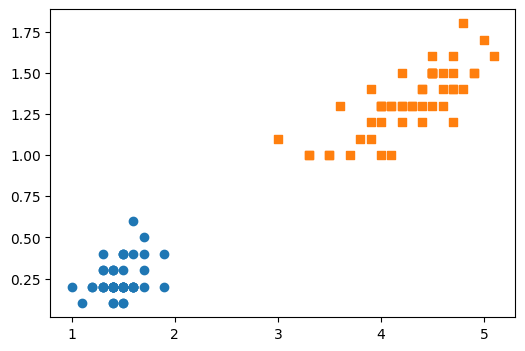

In [ ]:
# Plot data points
plt.figure(figsize=(6, 4))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", marker="o") # class 0 points
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", marker="s") # class 1 points

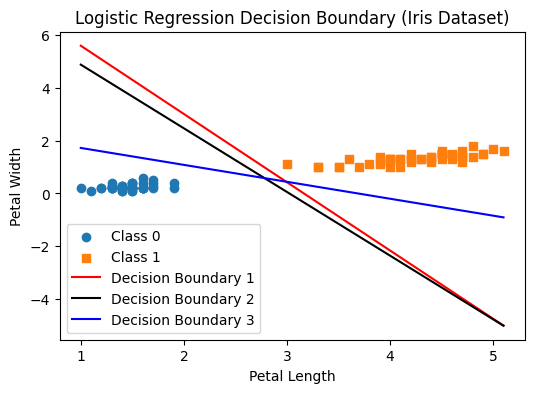

In [ ]:
from sklearn.linear_model import LogisticRegression

# Plot data points
plt.figure(figsize=(6, 4))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", marker="o") # class 0 points
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", marker="s") # class 1 points

C_vals = [0.001, 1, 1000]
colors = ["red", "black", "blue"]

for i in range(3):
  # Train logistic regression
  model = LogisticRegression(C = C_vals[i])
  model.fit(X, y)

  # Decision boundary: w1*x1 + w2*x2 + b = 0 --- (1)
  w1, w2 = model.coef_[0]
  b = model.intercept_[0]

  x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100) # x1
  y_vals = -(w1 * x_vals + b) / w2 # x2 from equation (1)

  plt.plot(x_vals, y_vals, color = colors[i], label="Decision Boundary "+str(i+1))

# Labels
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.title("Logistic Regression Decision Boundary (Iris Dataset)")
plt.show()


### **Why SVM?**

The key idea behind the SVM algorithm is to find the hyperplane that best separates two classes by **maximizing the margin between them.**
This margin is the distance from the hyperplane to the nearest data points (**support vectors**) on each side.

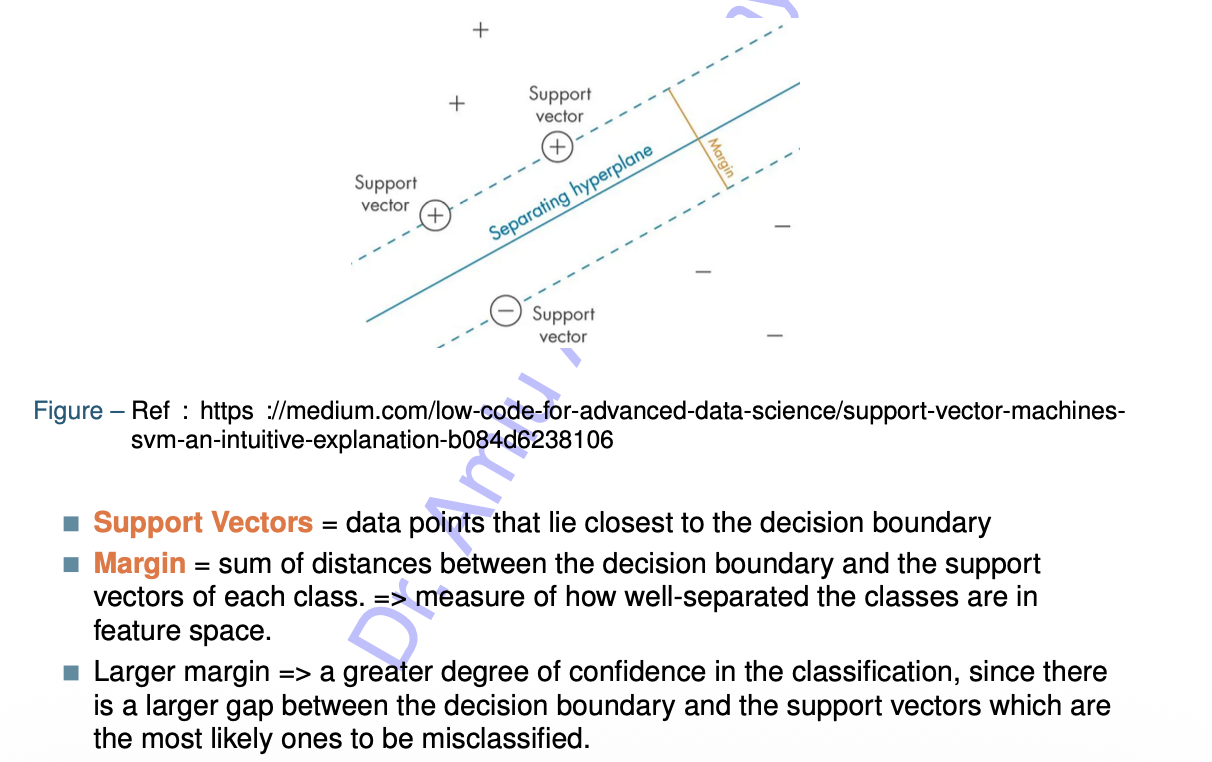

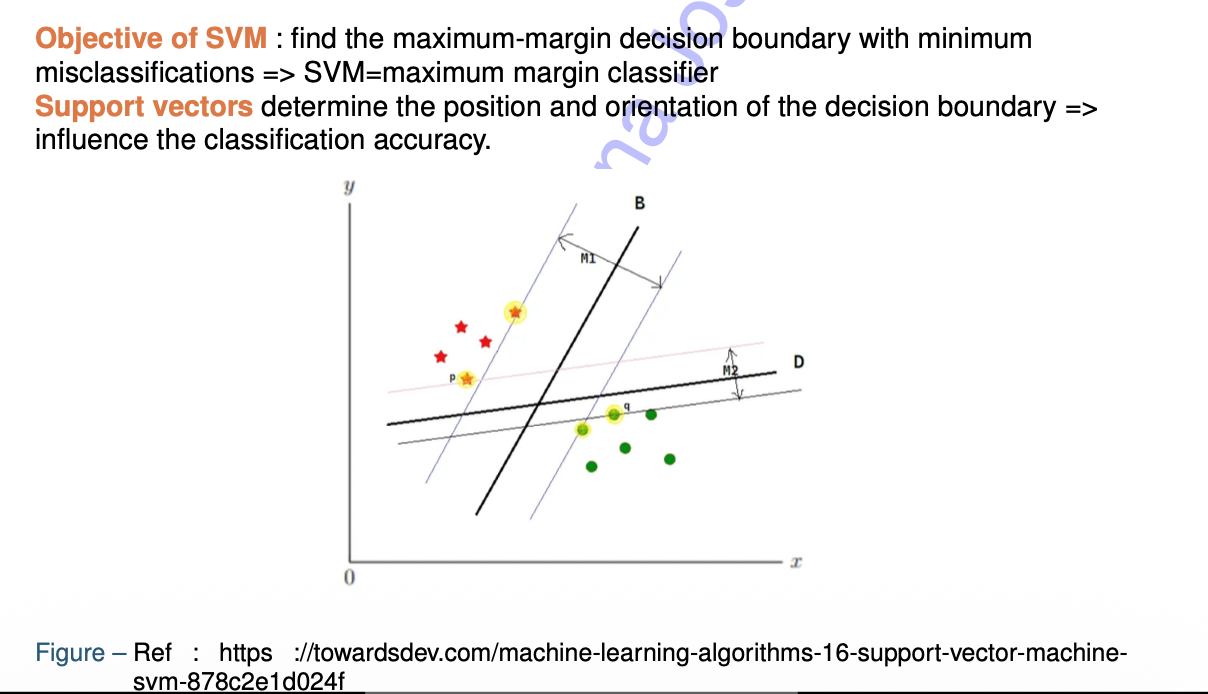

### **SVM Model Implementation Using Scikit-learn**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model building
svm = SVC(kernel="linear", C = 1.0)

# training
svm.fit(X_train, y_train)

# testing
y_pred = svm.predict(X_test)

# evaluation
accuracy_score(y_pred, y_test)

1.0

**ADVANTAGES:**

* Better performance on small or medium datasets

SVM focuses only on support vectors (critical boundary points). Logistic regression uses all points. This often gives SVM better generalization when data is limited.

* Maximizes margin (strong geometric guarantee)

SVM explicitly maximizes the margin between classes. Logistic regression only minimizes classification loss.
Larger margin → more robust to noise and unseen data.

* Works well in high-dimensional spaces

SVM performs strongly when number of features ≫ number of samples. Common in text classification, bioinformatics, image features.

* Handles non-linear boundaries naturally (kernels)

SVM can use kernel trick to learn complex, non-linear boundaries. Logistic regression requires manual feature engineering for non-linearity.

* Robust to multicollinearity

Margin-based optimization makes SVM less sensitive to correlated features. Logistic regression coefficients can become unstable.

* Strong regularization by design

SVM optimization directly balances: margin size/
classification error. Logistic regression needs explicit regularization tuning to avoid overfitting.

* Clear decision boundary (geometry-first model)

SVM is a geometric classifier. Especially useful when class separation matters more than probabilities.

**When NOT to prefer SVM?**

* You need probability estimates → Logistic Regression is better.

* Dataset is very large → SVM training can be slow.

* You need model interpretability → Logistic Regression is simpler.

### **Plotting SVM Decision Boundary**

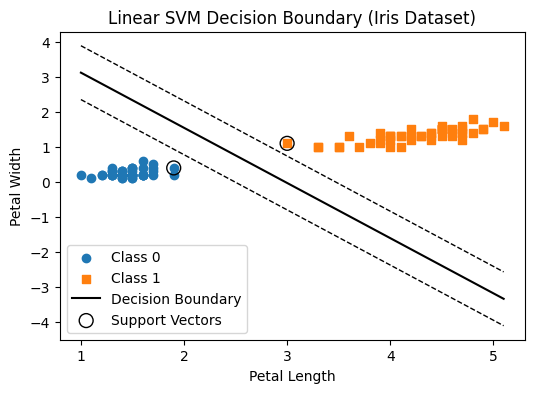

In [ ]:
# Train linear SVM
svm = SVC(kernel="linear", C=1.0)

# training: fit: decision boundary created
svm.fit(X, y)

# Plot data points
plt.figure(figsize=(6, 4))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", marker="o")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", marker="s")

# Get separating hyperplane
w = svm.coef_[0]
b = svm.intercept_[0]

# getting decision boundary(DB)
# X axis = x_vals = corresponding to feature x1, some values covering dataset
# Y axis = y_vals = corresponding to feature x2 derived from eqn: w1x1 + w2x2 + b = 0
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 200)
y_vals = -(w[0] * x_vals + b) / w[1]

# Margin lines: total margin is 2/||w||
# equally split to get margins up and down from DB
margin = 1 / np.linalg.norm(w)
y_margin_up = y_vals + margin
y_margin_down = y_vals - margin

# Plotting decision boundary and margins
plt.plot(x_vals, y_vals, "k-", label="Decision Boundary")
plt.plot(x_vals, y_margin_up, "k--", linewidth=1)
plt.plot(x_vals, y_margin_down, "k--", linewidth=1)

# Highlighting support vectors
plt.scatter(
    svm.support_vectors_[:, 0],
    svm.support_vectors_[:, 1],
    s=100,
    facecolors="none",
    edgecolors="k",
    label="Support Vectors"
)

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.title("Linear SVM Decision Boundary (Iris Dataset)")
plt.show()

# **SVM for Breast Cancer Detection**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

# 1. Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# model building
svm = SVC(kernel="linear", C = 1.0)

# training
svm.fit(X_train, y_train)

# testing
y_pred = svm.predict(X_test)

# evaluation
accuracy_score(y_pred, y_test)

0.956140350877193

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[38  4]
 [ 1 71]]


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



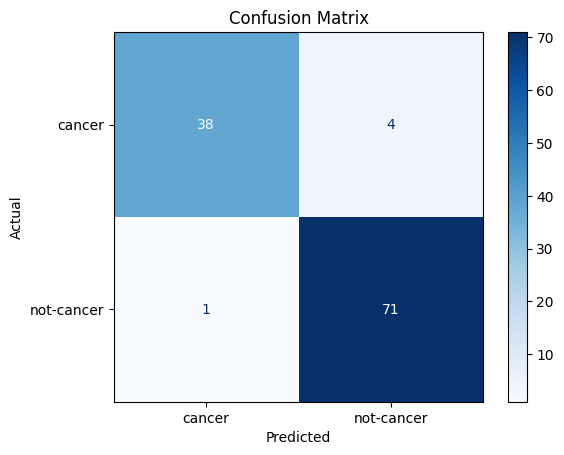

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["cancer", "not-cancer"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(np.arange(2))
plt.yticks(np.arange(2))
plt.show()

# **Understanding SVM better**

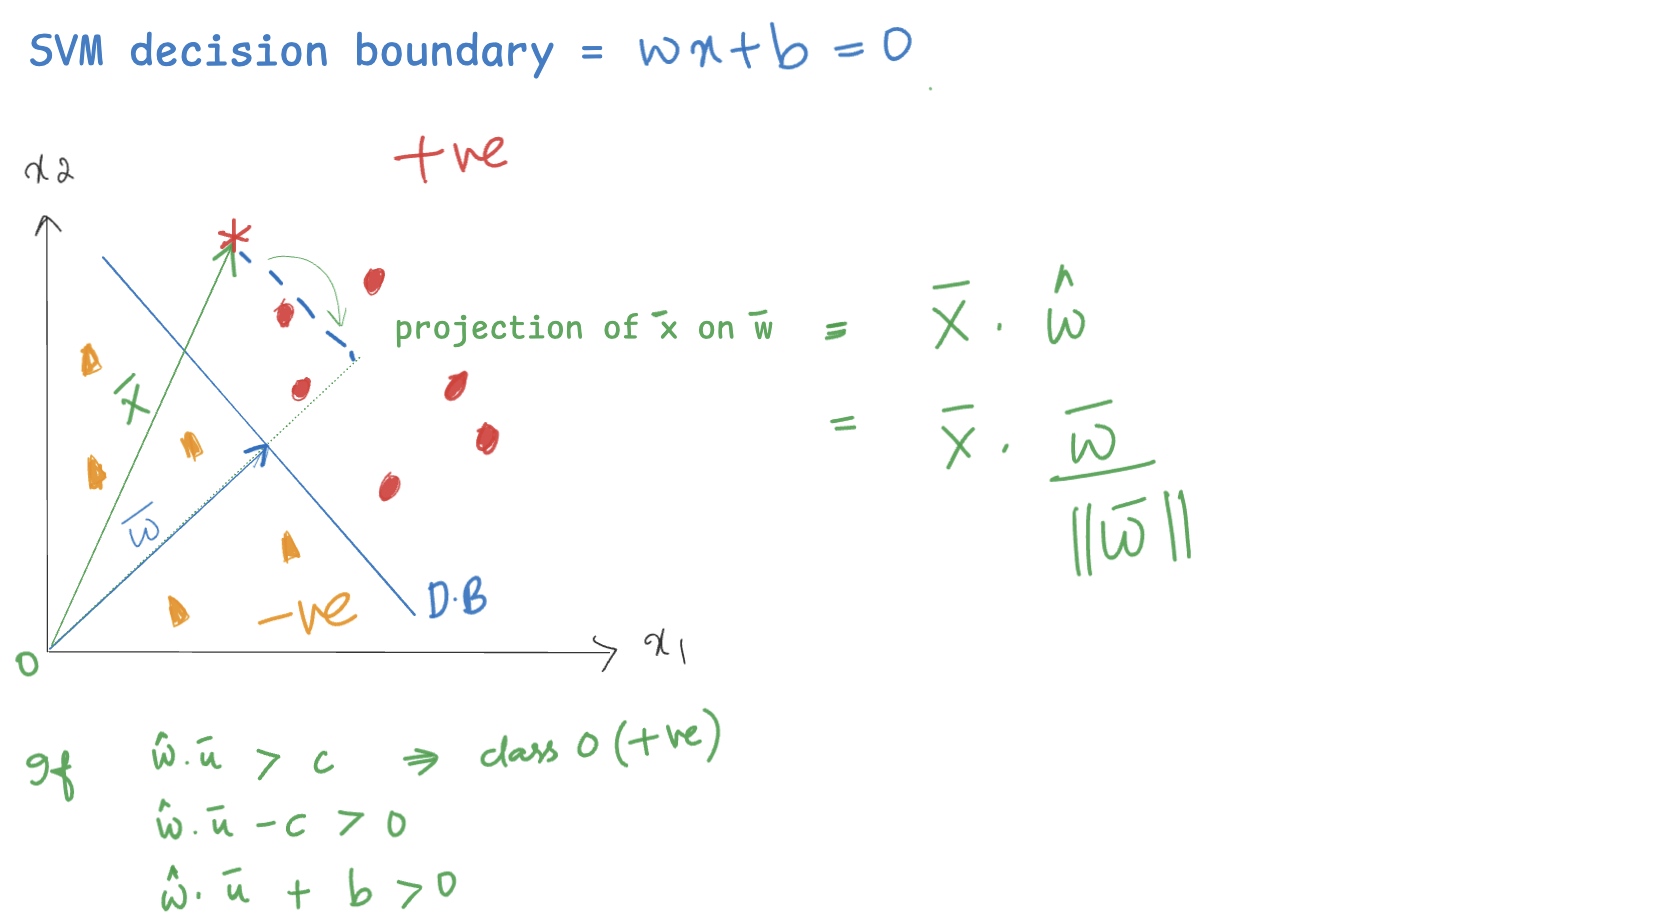

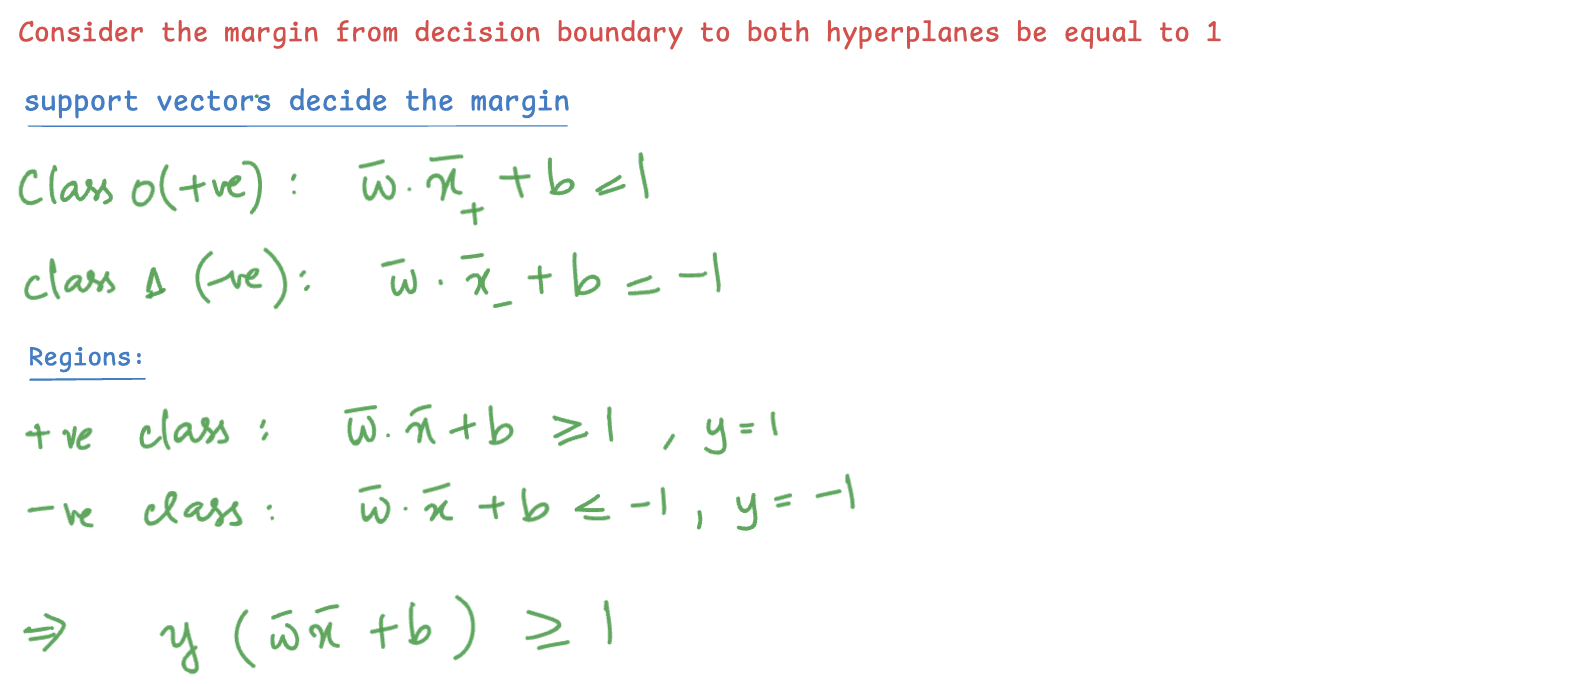

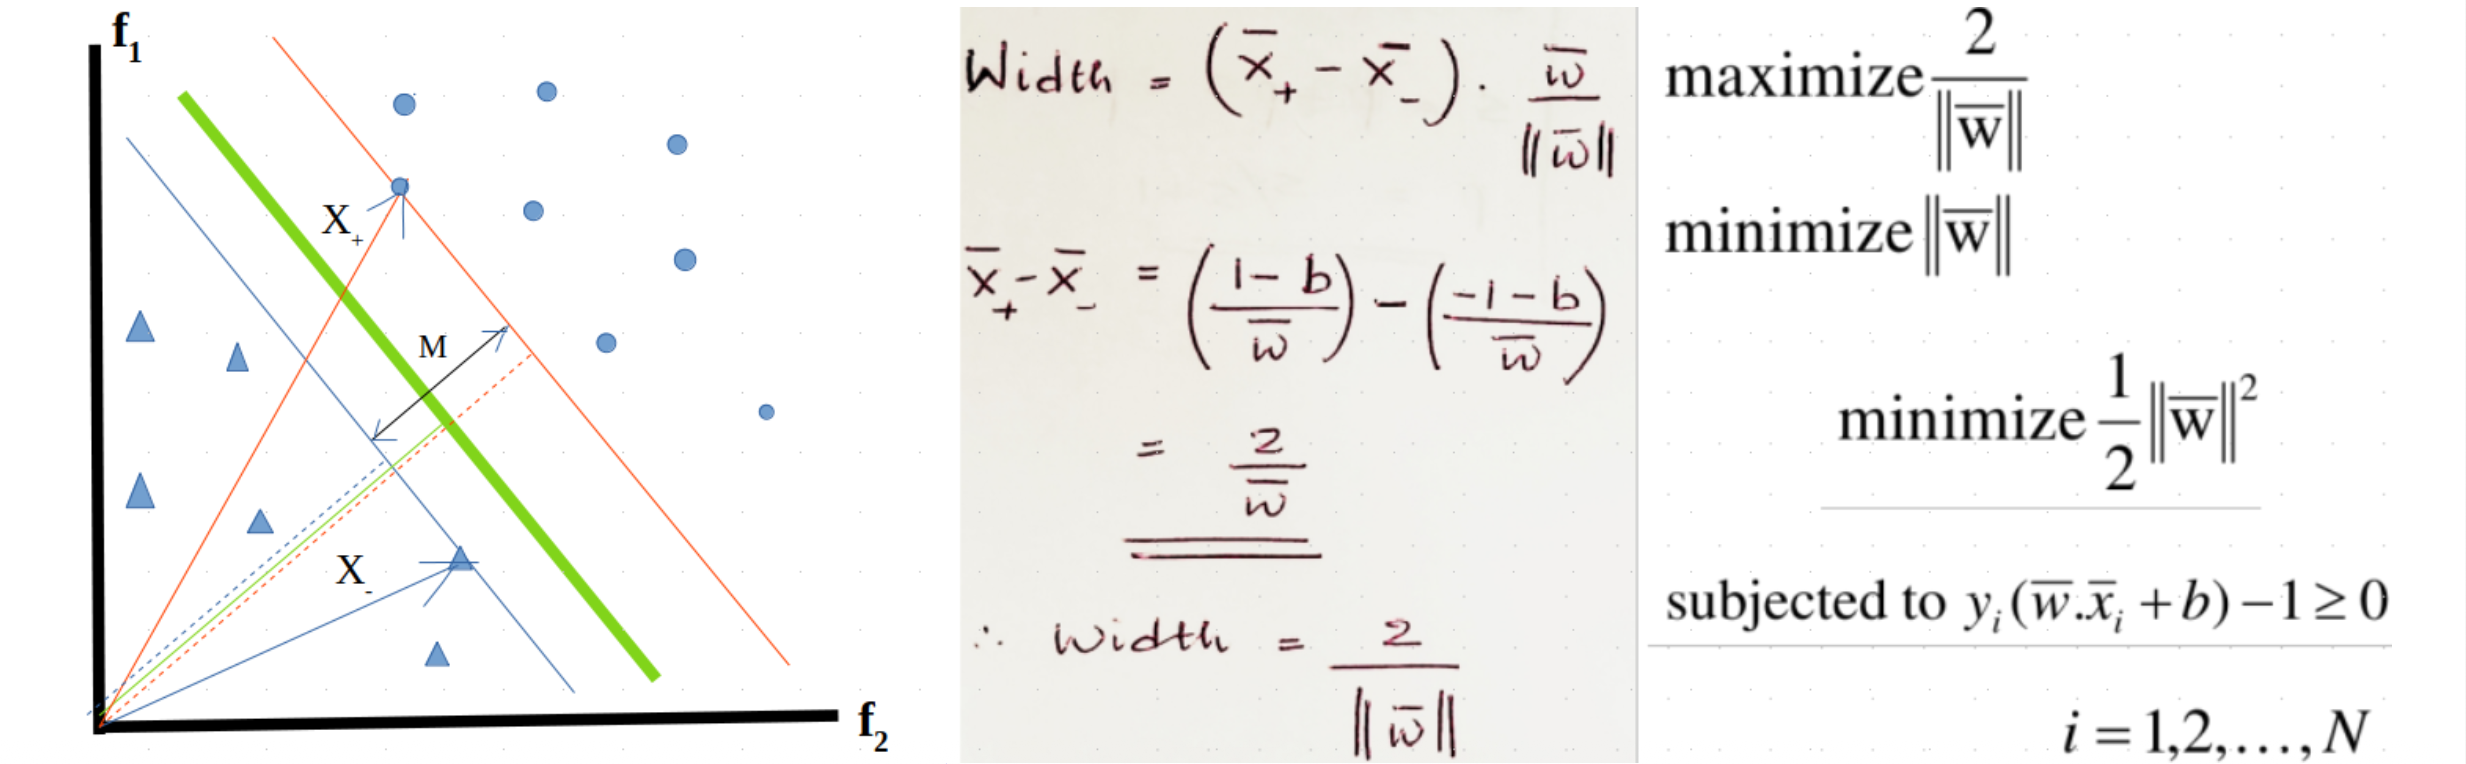

### **Maximum-margin classifier**
SVM finds the hyperplane with the maximum margin by minimizing ∥w∥ under classification constraints.

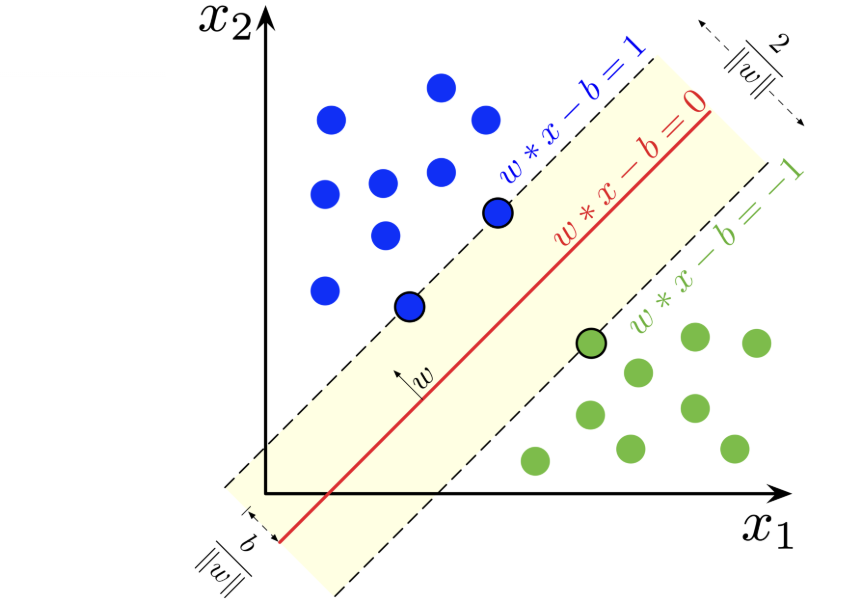

Ref: https://commons.wikimedia.org/wiki/File:SVM_margin.png

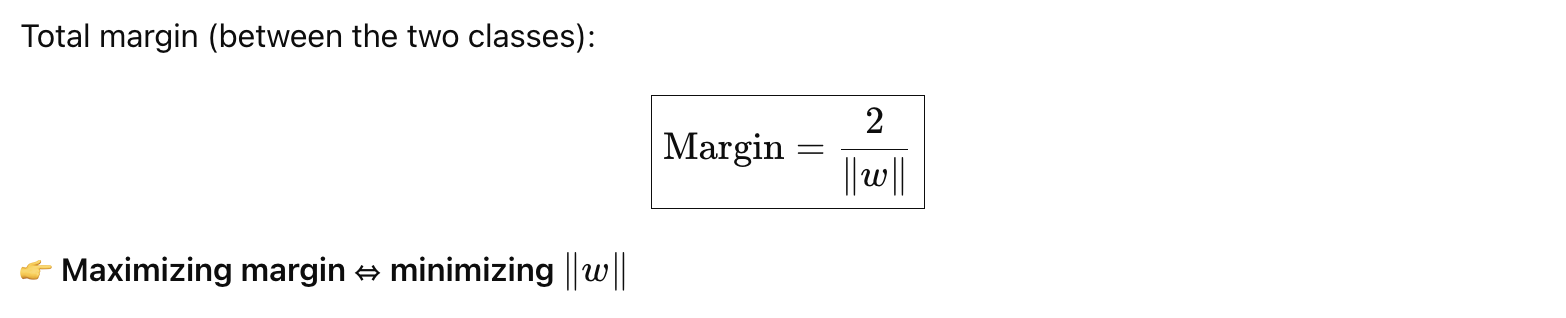

**Optimization problem (Hard Margin SVM)**

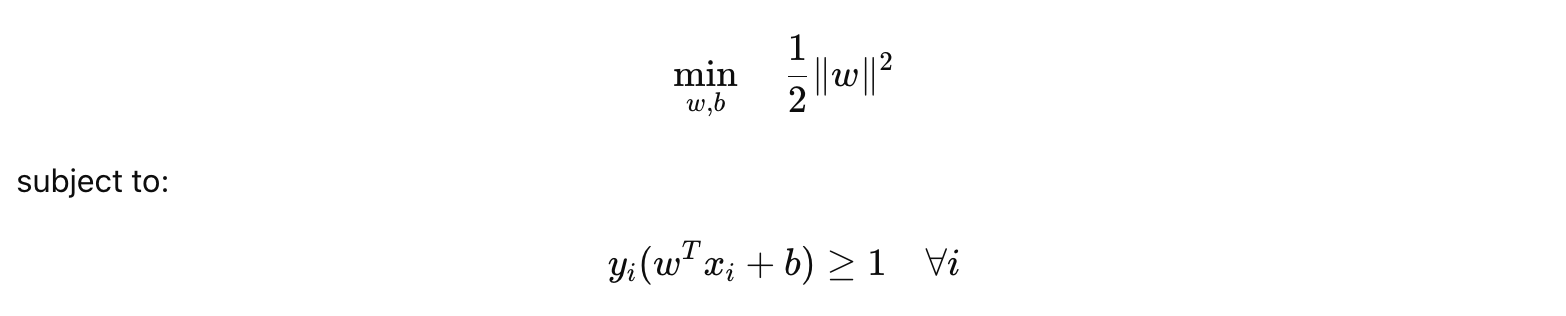

**Soft Margin SVM (real-world data)**

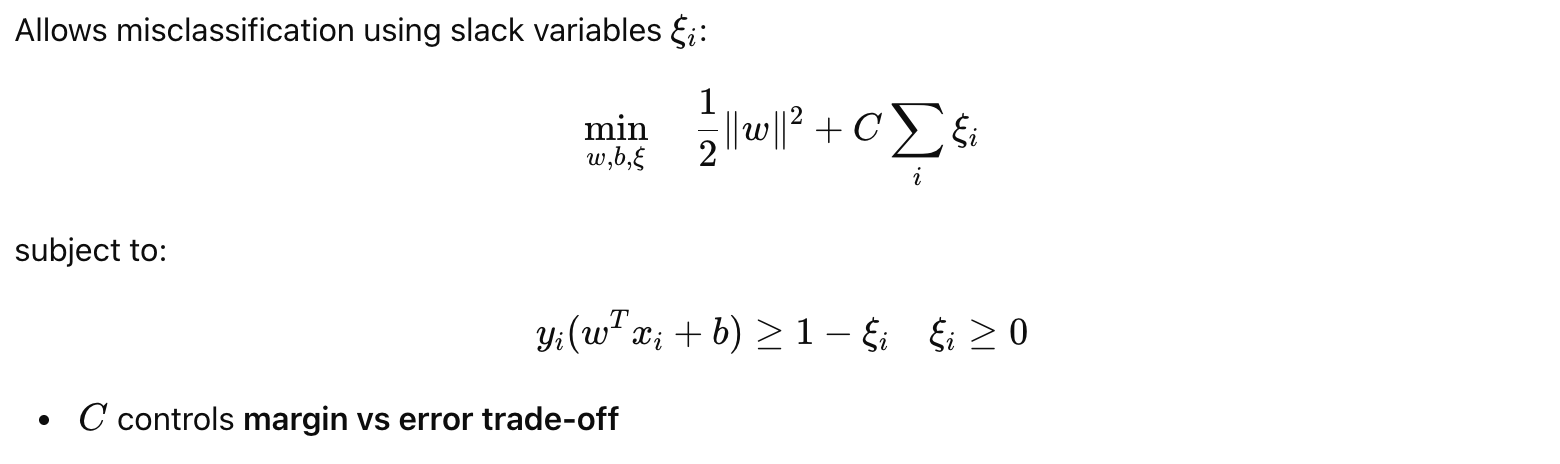

* ∥w∥2
 → controls margin size

* ∑
𝜉
𝑖
→ total constraint violation (errors) = Loss term = Hinge Loss

* C → how much we penalize errors

### **Hinge Loss**

- Standard loss function used for training SVMs.
- Designed for maximum-margin classification in binary classification problem.
- Penalize not only misclassifications but also predictions that are insufficiently confident or data points that lie too close to the decision boundary.
- Hingle loss L is defined for a single data point as:

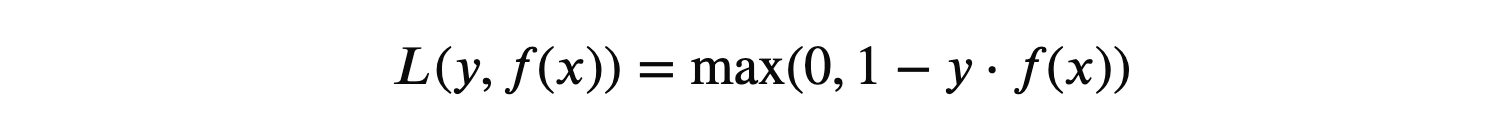

where: \(y\) is the true class label (+1 or -1), and \(f(x)\) is the predicted output of the classifier  for the input \(x\).
- y * f(x) ≥ 1 => Correctly classified and outside the margin: confident => L = 0.
- 0 < y * f(x) < 1 => Correctly classified but within the margin: less confident => L > 0
- y * f(x) ≤ 0 => Misclassified to the wrong side => L > 1, increases linearly with the distance from the margin.

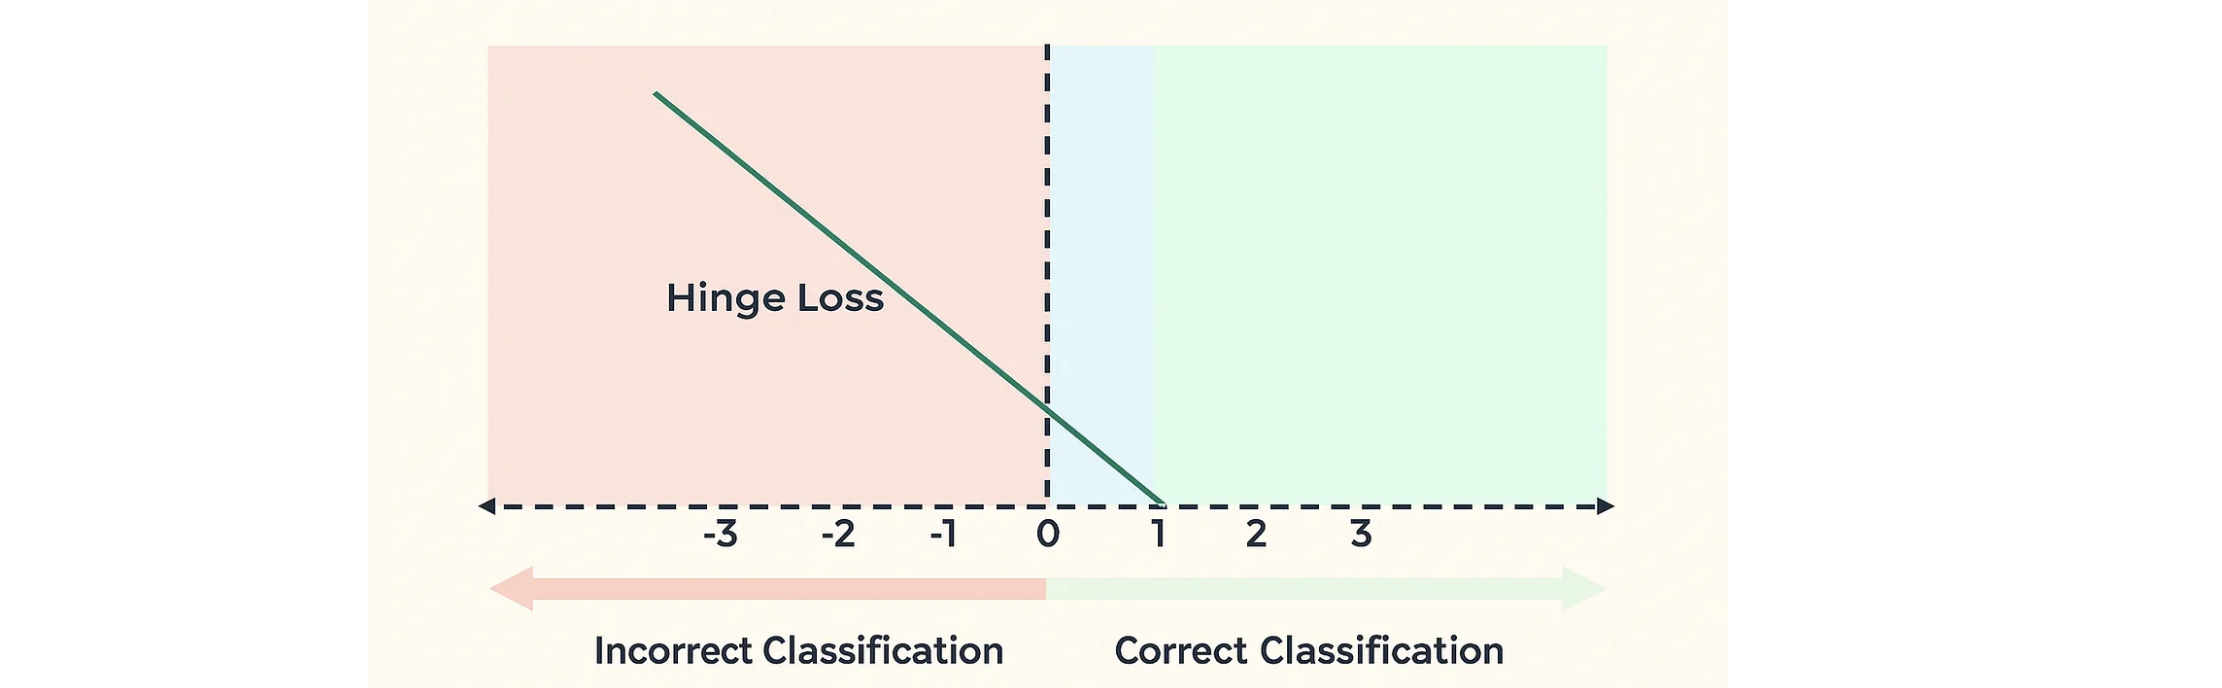

Ref: https://python.plainenglish.io/how-svms-finally-made-sense-after-a-lot-of-confusion-0a4318537830

### **Parameter C**
- Regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification errors on the training data.
- **Large C**: Errors are heavily penalized, so SVM tries to classify every training data point correctly => risk of overfitting, and narrow margin
- **Small C**: Errors are tolerated, misclassifications allowed => better generalization, and wider margin


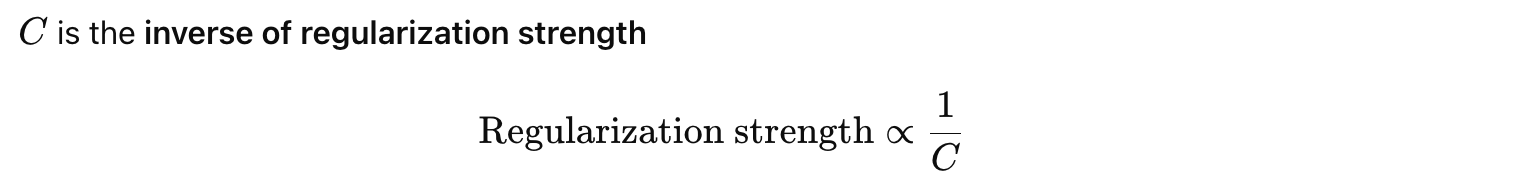

**Practical guidelines:**

* Start with 𝐶 = 1 (default)

* If overfitting → decrease 𝐶
* If underfitting → increase 𝐶


Tune using cross-validation



---



# **K-fold cross-validation to find optimal C value:**

**Implement SVC on breast cancer data. Find the optimal value of C among 0.01, 0.1, 1, 10 and 100 using 4-fold cross validation. Monitor recall to find the optimum classifier.**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

# 1. Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score

# Set up k-fold cross-validation
kf = KFold(n_splits = 4, shuffle=True, random_state=42)

best_score = 0
best_C = None
C_values = [0.01, 0.1, 1, 10, 100]

# find best using kf-cv
for C in C_values:

    # model building
    model = SVC(kernel="linear", C = C)

    # Compute cross-validated recalls:
    scores = cross_val_score(model, X_train, y_train, cv = kf, scoring='recall')

    # find mean
    mean_score = scores.mean()

    print(f"C={C}, Mean CV Recall={mean_score:.4f}")

    if mean_score > best_score:
        best_score = mean_score
        best_C = C

# best C
print(f"\nBest C: {best_C} with Mean CV Recall: {best_score:.4f}")

C=0.01, Mean CV Recall=0.9716
C=0.1, Mean CV Recall=0.9717
C=1, Mean CV Recall=0.9716
C=10, Mean CV Recall=0.9680
C=100, Mean CV Recall=0.9716

Best C: 0.1 with Mean CV Recall: 0.9717


In [ ]:
# best model
svm = SVC(kernel="linear", C = best_C)

# training
svm.fit(X_train, y_train)

# testing
y_pred = svm.predict(X_test)

# evaluation using accuracy
accuracy_score(y_pred, y_test)

0.956140350877193

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

